In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
# Reads CSV
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='latin-1')

# Prints dataframe info
print(df.head())
print(df.info())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
# Cleaning data

print(df.isnull().sum())

df["Order Date"] = pd.to_datetime(df["Order Date"])

df["month"] = df["Order Date"].dt.month

df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

month_categories = [calendar.month_name[i] for i in range(1, 13)]
df['month_name'] = pd.Categorical(df['month_name'], categories=month_categories, ordered=True)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


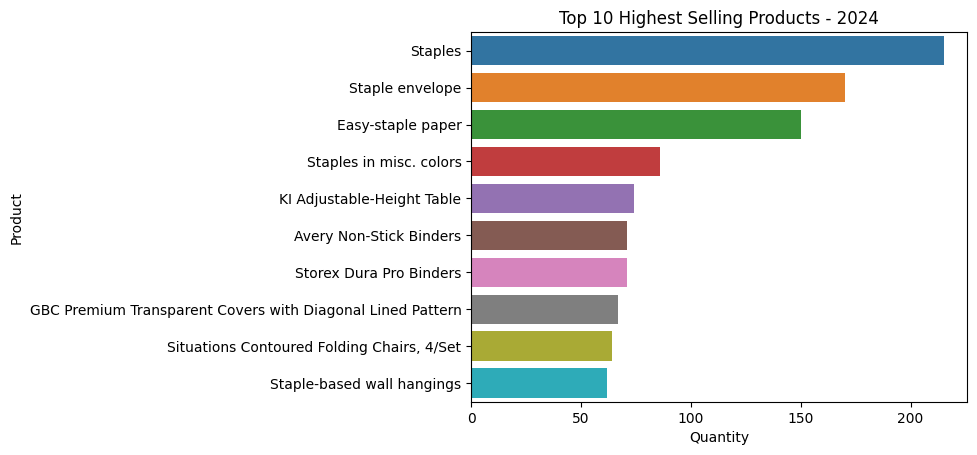

In [4]:
# Bar plot with the top 10 highest selling products

top_products = df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Highest Selling Products - 2024")
plt.xlabel("Quantity")
plt.ylabel("Product")
plt.show()

/tmp/ipykernel_31/2600004088.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby("month_name")["Sales"].sum()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


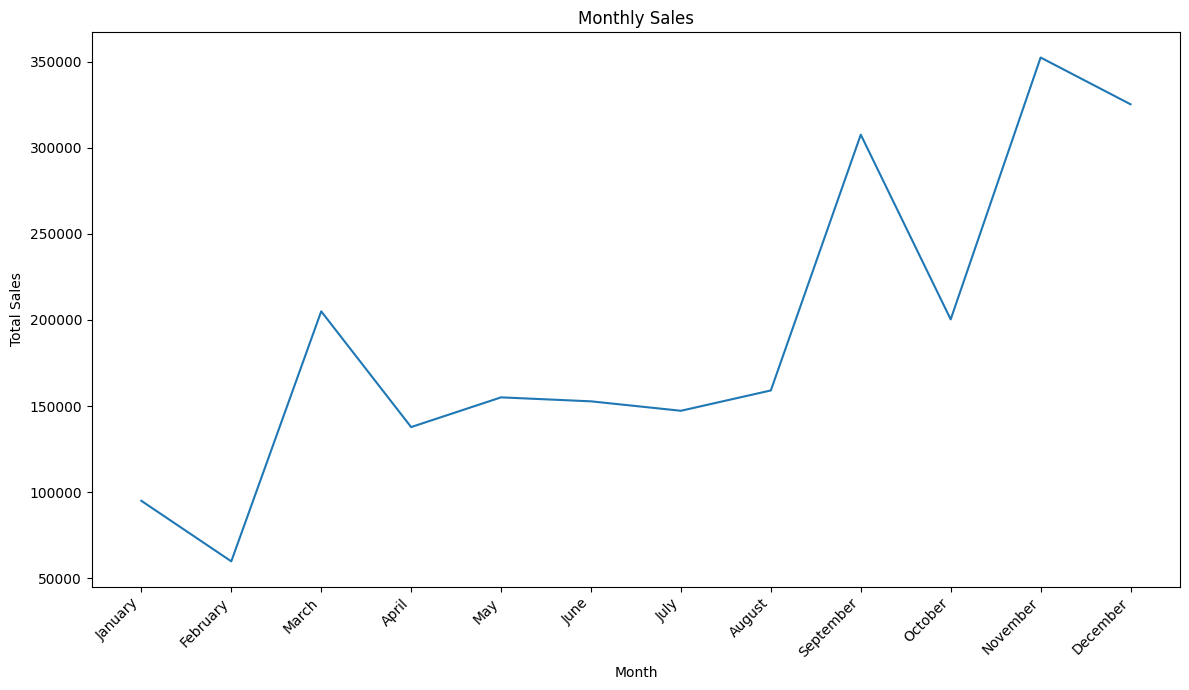

In [5]:
# Line plot showing total monthly sales

monthly_sales = df.groupby("month_name")["Sales"].sum()
plt.figure(figsize=(12, 7))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

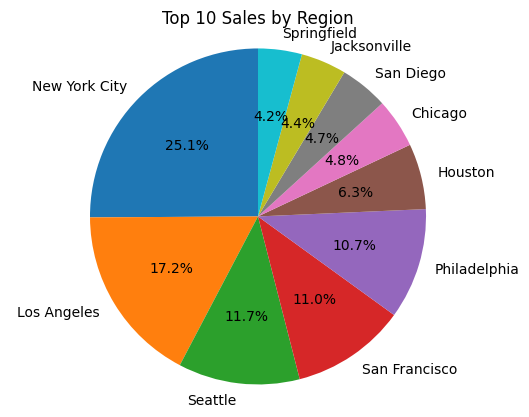

In [6]:
# Pie chart showing the top 10 regions with most sales

region_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)
region_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Sales by Region")
plt.ylabel("") 
plt.axis('equal')  
plt.show()